In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Step 1: Load the dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
# Step 1: Perform exploratory data analysis (EDA)
print(df.info())
print("*"*100)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
****************************************************************************************************
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710

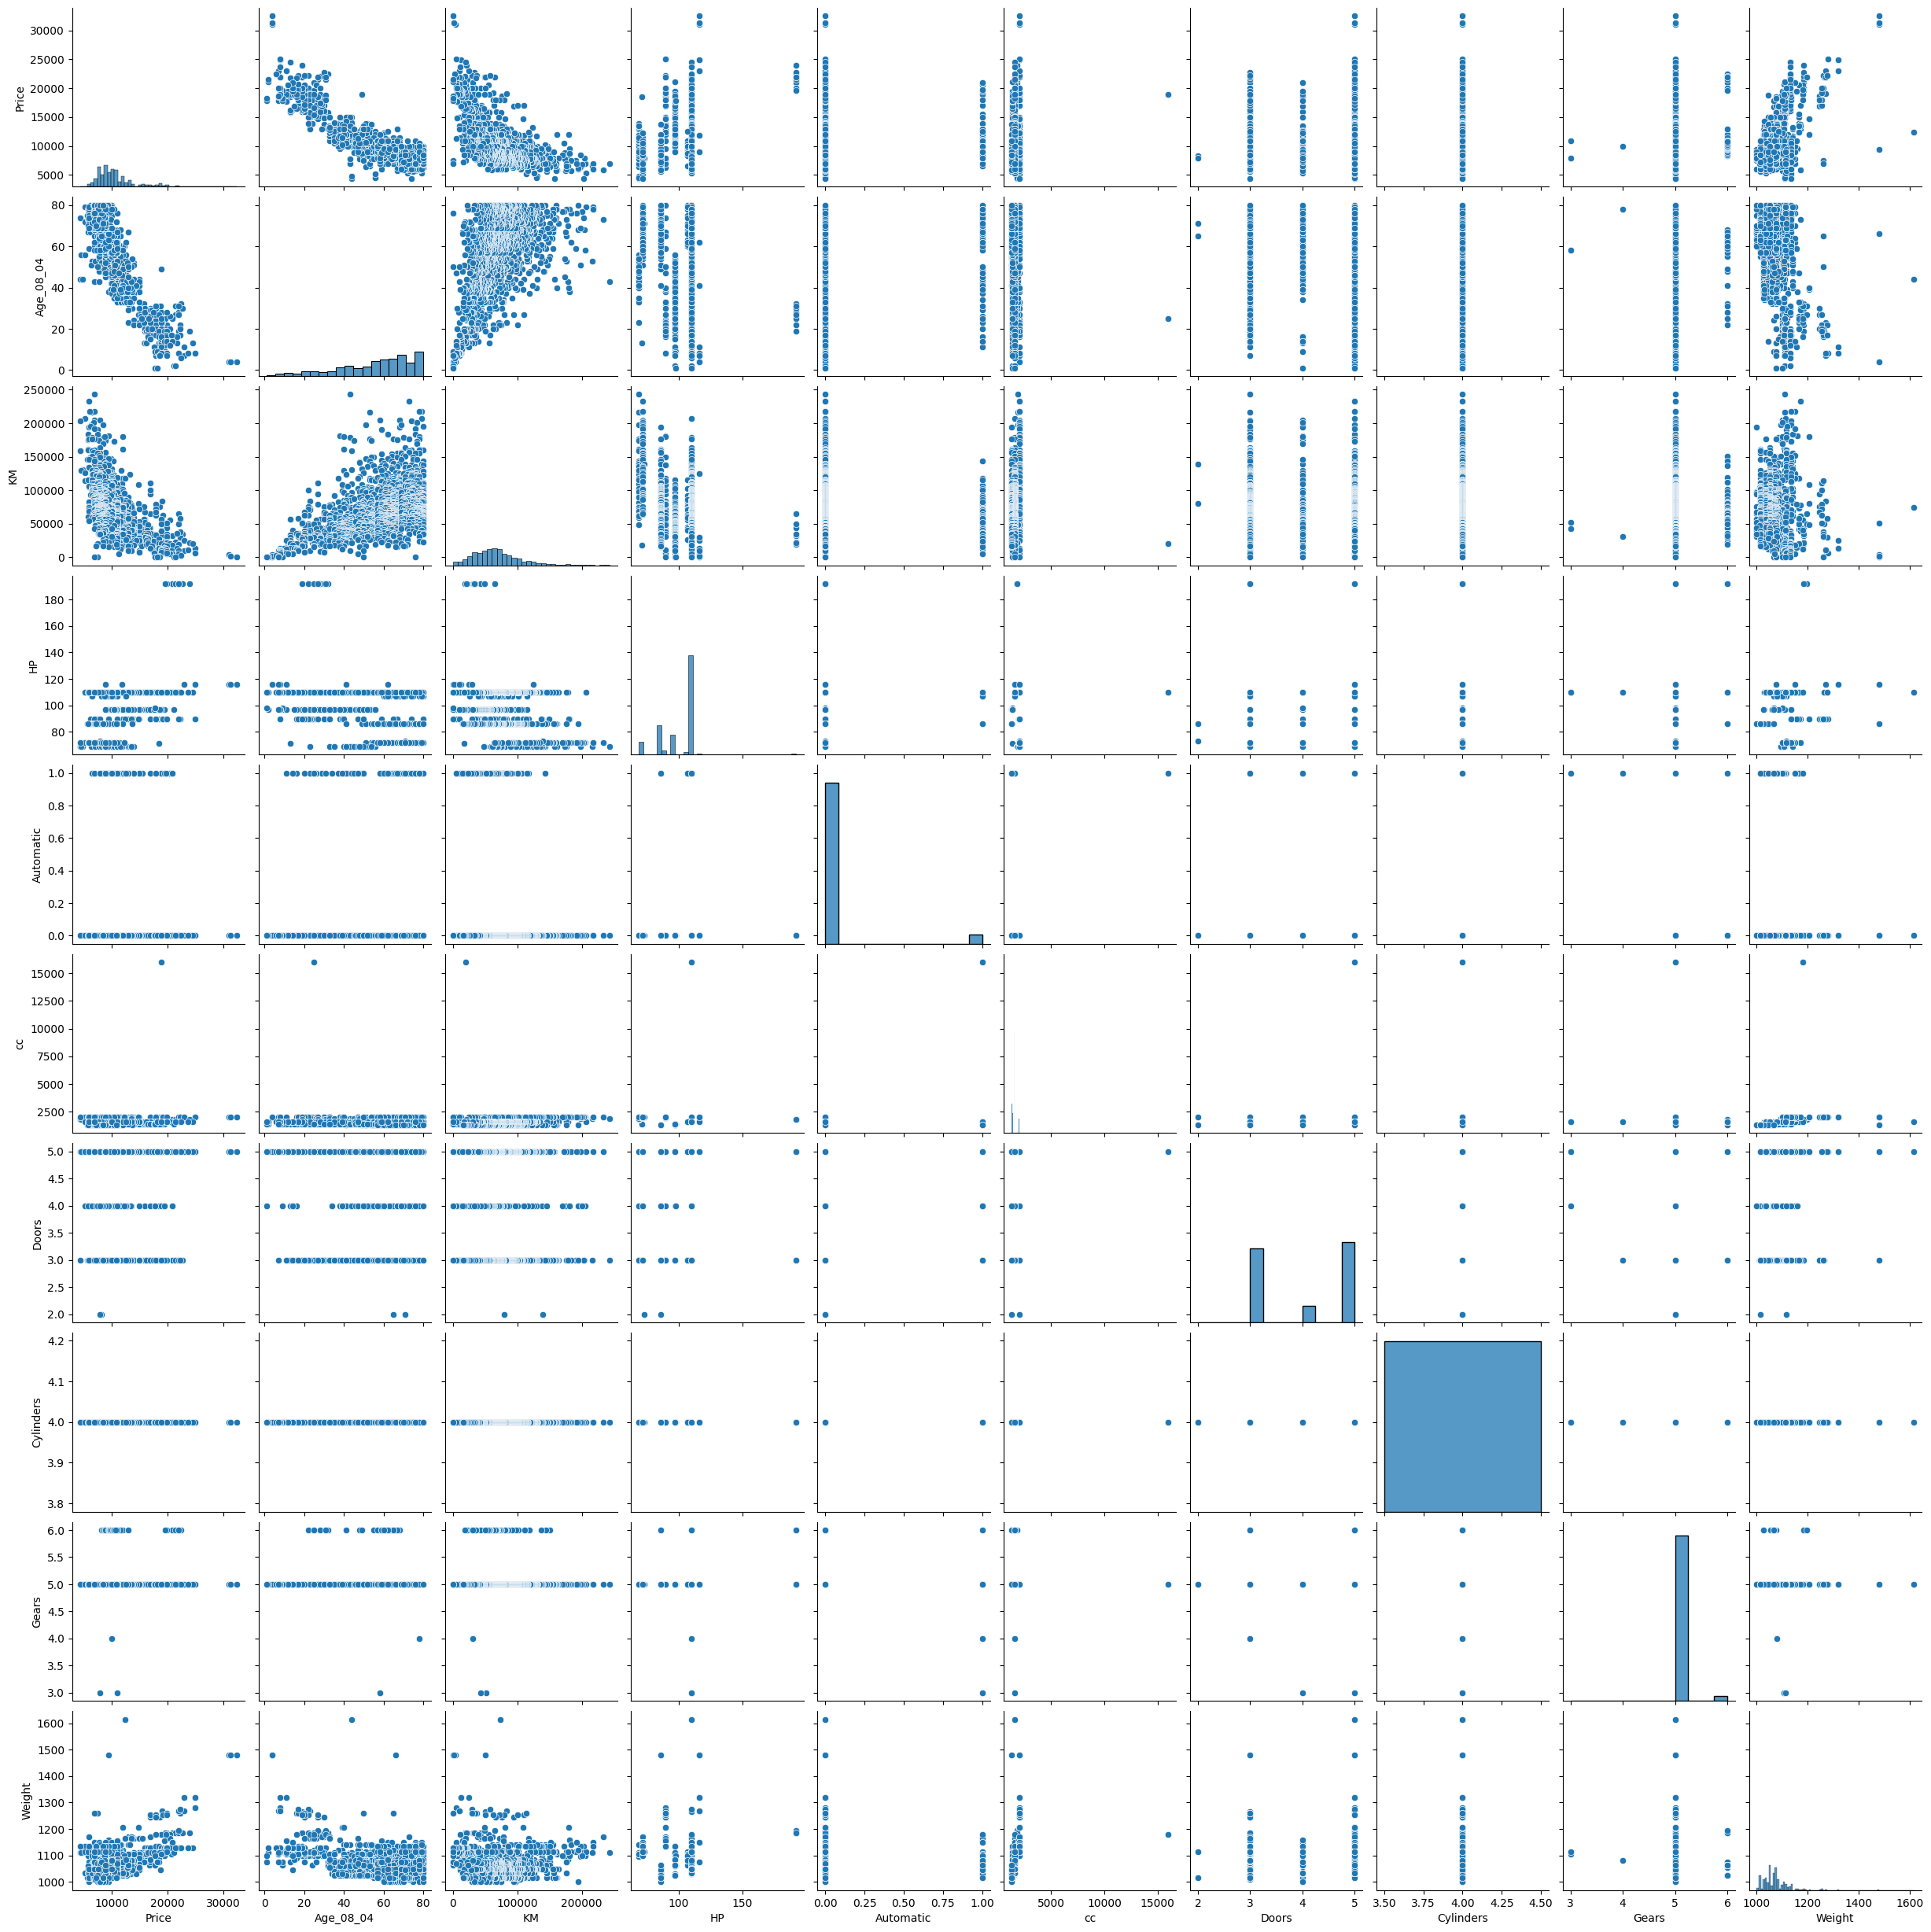

In [6]:
# Visualizations
sns.pairplot(df)
plt.show()

In [7]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [9]:
# Convert categorical variable 'FuelType' into numerical using Label Encoding
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])

In [10]:
# Step 1.1: Check for multicollinearity using VIF
X = df.drop(columns=['Price'])
X['Intercept'] = 1  # Add intercept for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
      Feature       VIF
0   Age_08_04  1.918394
1          KM  1.946100
2   Fuel_Type  2.379914
3          HP  1.488481
4   Automatic  1.062652
5          cc  1.168921
6       Doors  1.186610
7   Cylinders  0.000000
8       Gears  1.113522
9      Weight  2.327003
10  Intercept  0.000000


d:\Selenium\webdriver\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [11]:
# Drop features with high VIF if necessary
X = X.drop(columns=['Intercept'])  # Remove intercept after VIF check

In [12]:
# Step 2: Split the dataset into training and testing sets
y = df['Price']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Step 3: Build multiple linear regression models
models = {
    "Model 1: Basic MLR": LinearRegression(),
    "Model 2: Ridge Regression": Ridge(alpha=1.0),
    "Model 3: Lasso Regression": Lasso(alpha=0.1)
}

In [15]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R-squared Score: {r2_score(y_test, y_pred)}")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)


Model 1: Basic MLR
Mean Squared Error: 2096851.140017704
R-squared Score: 0.8428476112018002
Coefficients: [-2.27866183e+03 -6.38190520e+02  3.36164102e+02  3.06574796e+02
  5.66687950e+01 -3.42786819e+01 -3.45693582e+01 -2.84217094e-14
  1.05114548e+02  1.19603224e+03]
Intercept: 10754.395470383277

Model 2: Ridge Regression
Mean Squared Error: 2096174.254118946
R-squared Score: 0.8428983416680234
Coefficients: [-2276.25271729  -639.46421038   334.57402457   306.8741595
    56.60365106   -34.0019906    -34.02768214     0.
   105.18033715  1195.01808196]
Intercept: 10754.395470383277

Model 3: Lasso Regression
Mean Squared Error: 2096720.8747663768
R-squared Score: 0.8428573741721097
Coefficients: [-2278.63156306  -638.20669307   335.9689824    306.56749224
    56.5814541    -34.13754136   -34.41804035     0.
   105.04766788  1195.76112368]
Intercept: 10754.395470383277


In [16]:
# Step 4: Assess model fit using Adjusted R-squared, AIC, and BIC
X_train_const = sm.add_constant(X_train)  # Add constant term for statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()
print(model_sm.summary())  # Provides Adjusted R-squared, AIC, and BIC

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     842.5
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:58:46   Log-Likelihood:                -9866.5
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1138   BIC:                         1.980e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.075e+04     38.749    277.542      0.0

In [17]:
# Step 5: Apply Lasso and Ridge methods explicitly
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)
print("\nRidge Regression with alpha=10")
print("Mean Squared Error:", mean_squared_error(y_test, y_ridge_pred))
print("R-squared Score:", r2_score(y_test, y_ridge_pred))



Ridge Regression with alpha=10
Mean Squared Error: 2090713.5248092178
R-squared Score: 0.843307606130925


In [18]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)
print("\nLasso Regression with alpha=0.5")
print("Mean Squared Error:", mean_squared_error(y_test, y_lasso_pred))
print("R-squared Score:", r2_score(y_test, y_lasso_pred))


Lasso Regression with alpha=0.5
Mean Squared Error: 2096206.097882053
R-squared Score: 0.8428959550782721


In [19]:
# Step 6: Consider Robust Regression to Handle Outliers
robust_model = sm.RLM(y_train, X_train_const, M=sm.robust.norms.HuberT()).fit()
print("\nRobust Regression Summary:")
print(robust_model.summary())


Robust Regression Summary:
                    Robust linear Model Regression Results                    
Dep. Variable:                  Price   No. Observations:                 1148
Model:                            RLM   Df Residuals:                     1138
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 11 Mar 2025                                         
Time:                        19:59:16                                         
No. Iterations:                    47                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.074e+04   

# Normalization & Standardization

Normalization and standardization are methods used to scale numerical data so that all features contribute equally to a model. Normalization scales values between a fixed range, usually 0 to 1, which is useful when features have different units or ranges. Standardization transforms data to have a mean of 0 and a standard deviation of 1, making it useful for algorithms that assume normal distribution. These techniques help machine learning models learn better by preventing features with larger values from dominating smaller ones, improving accuracy and stability.

# Addressing Multicollinearity

Multicollinearity happens when two or more features in a dataset are highly related, making it hard for a regression model to determine the individual effect of each feature. To fix this, we can remove one of the correlated features, use Principal Component Analysis (PCA) to reduce feature dimensions, or apply Ridge Regression (L2 regularization), which adds a penalty to large coefficients and reduces their impact. Handling multicollinearity ensures the model remains reliable and interpretable.